Lambda School Data Science

*Unit 1, Sprint 3, Module 1*

---

# STATISTICS PROBABILITY AND INFERENCE ASSIGNMENT

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
# import pandas to load the data file.
import pandas as pd 

In [0]:
# label and load the data frame, 'header=None', '? = NaN'.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', na_values='?', header=None)
# label column '0' 'class'.
df = df.rename(columns={0: 'class'})
# show the shape of the data frame.
print(df.shape)
# show the data frame with headers.
df.head()

(435, 17)


,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
# replace the 'n' with '0'.
df = df.replace('n',0)
# replace the '7' with '1'.
df = df.replace('y',1)
# replace the 'democrat' with '1'.
df = df.replace('democrat', 1)
# replace the 'republican' with '2'.
df = df.replace('republican', 2)
# show the data frame with headers.
df.head()

,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# check for NaN values.
df.isna().sum()

class      0
1         12
2         48
3         11
4         11
5         15
6         11
7         14
8         15
9         22
10         7
11        21
12        31
13        25
14        17
15        28
16       104
dtype: int64

In [0]:
# label a new data frame and fill in all the NaN with '.5'.
df1 = df.fillna(.5)
# show the data frame shape.
df1.shape

(435, 17)

In [0]:
# check all the NaN's are gone.
df1.isna().sum()

class    0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
dtype: int64

In [0]:
# check all the data types.
df1.dtypes

class      int64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
dtype: object

In [0]:
# show the data frame and headers.
df1.head() 

,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,1,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


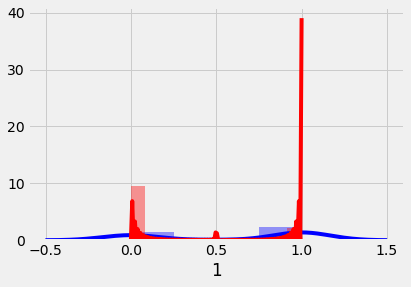

In [0]:
# import seaborn to plot graphs.
import seaborn as sns
# plot the 'class' = '1', for column '1', color 'b' .
sns.distplot(df1[df1['class'] == 1][1], color = 'b')
# plot the 'class' = '2', for column '1', color 'r'.
sns.distplot(df1[df1['class'] == 2][1], color = 'r')

In [0]:
# import scipy.stats imp for 't-tests'.
from scipy.stats import  ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
# ttest used on 'class' '1' & '2' for column '1'.
tstat, pvalue = ttest_ind(df1[df1['class'] == 1][1], df1[df1['class'] == 2][1])
# print the 'tstat' for the test.
print('tstat # =', tstat)
# print the 'pvalue' for the test.

print('pvalue # =', pvalue)

tstat # = 9.22317772154614
pvalue # = 1.2761169357253626e-18


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


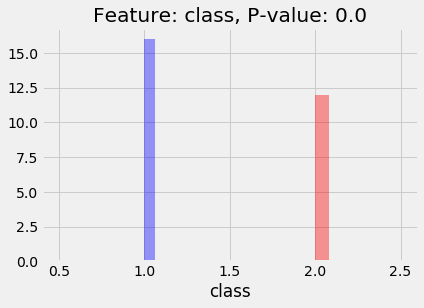

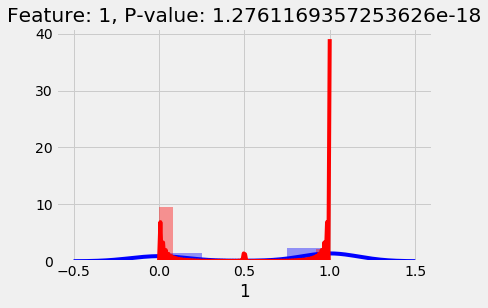

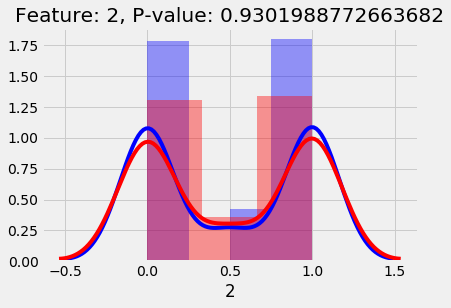

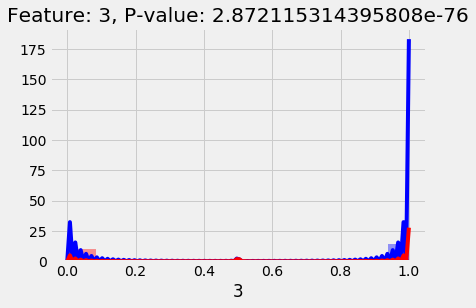

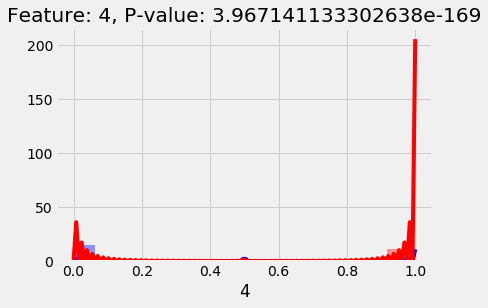

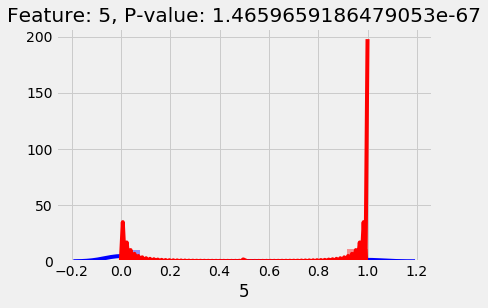

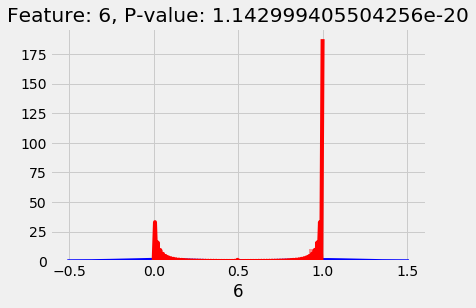

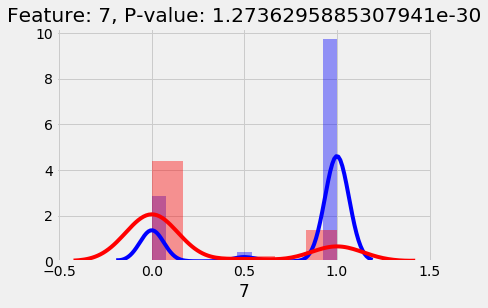

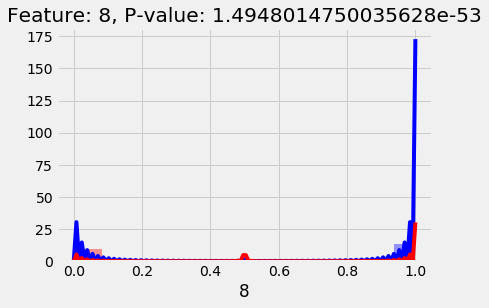

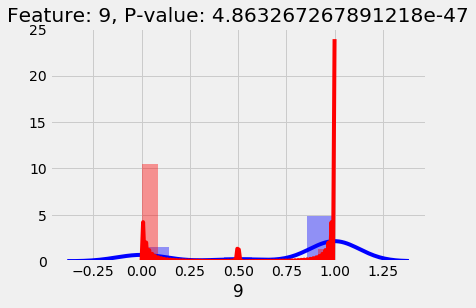

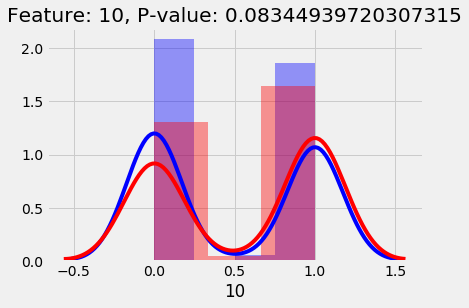

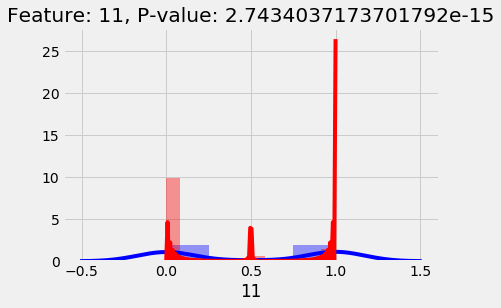

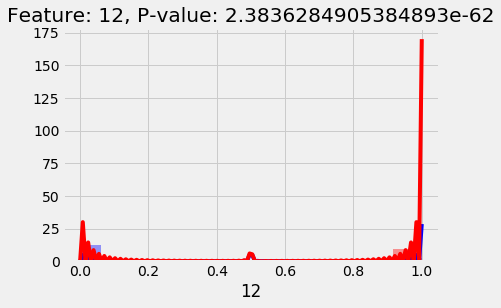

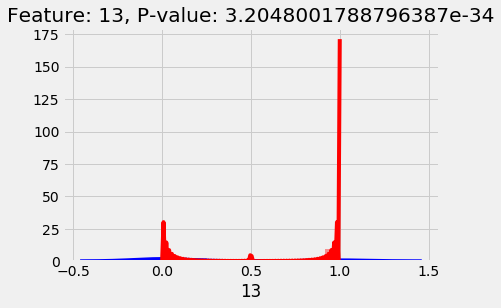

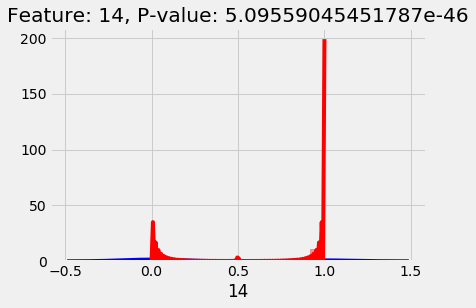

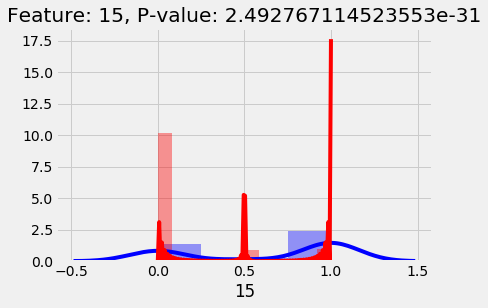

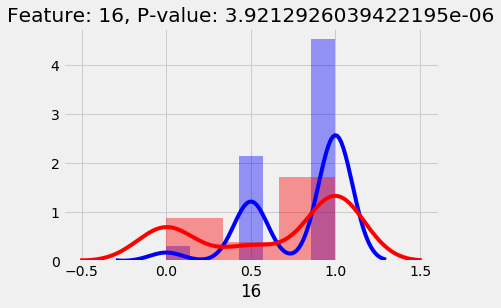

<Figure size 432x288 with 0 Axes>

In [0]:
# import mat plot lib for graphs.
import matplotlib.pyplot as plt
# import seaborn for graphs.
import seaborn as sns
# create a loop.
for feat in df1.columns:
  # Split groups '1' & '2' from 'class'.
  group1 = df1[df1['class'] == 1][feat]
  group2 = df1[df1['class'] == 2][feat]

  # create sns plots for each group with colors.
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  # run the ttest_ind for 'group1' & 'group2'.
  _, pvalue = ttest_ind(group1, group2)
  
  # give the graphs a title of the 'feature' and the 'pvalue'.
  plt.title(f'Feature: {feat}, P-value: {pvalue}')

  # plt.figure at the end to finish each loop with a graph.
  plt.figure()

In [0]:
 # create a loop that prints if it rejects or accepts the null hypothesis.
for feat in df1.columns:
  # split the groups.
  group1 = df1[df1['class'] == 1][feat]
  group2 = df1[df1['class'] == 2][feat]
  # use the ttest_ind.
  _, pvalue = ttest_ind(group1, group2)
  # set 1st filter.
  if pvalue<0.01:
      print("reject null hypothesis")
    # set 2nd filter.
  else:
      print("accept null hypothesis")

reject null hypothesis
reject null hypothesis
accept null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
accept null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis


In [0]:
# create two data sets for each class.
democrats = df1.loc[df1['class']== 1]
republicans = df1.loc[df1['class']== 2]
# create a data frame from the 'mean' of each data set.
mean = pd.DataFrame(
    {'Democrats': democrats.mean(),
     'Republicans': republicans.mean()
    })
# set a transverse matrix as it will look better.
df2 = mean.T
#show the data frame with headers.
df2



,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Democrats,1.0,0.601124,0.501873,0.878277,0.067416,0.228464,0.477528,0.764045,0.823970,0.739700,0.471910,0.505618,0.168539,0.301498,0.355805,0.629213,0.801498
Republicans,2.0,0.193452,0.505952,0.142857,0.979167,0.943452,0.892857,0.250000,0.175595,0.122024,0.556548,0.151786,0.842262,0.839286,0.961310,0.119048,0.636905


In [0]:
# show the types of data.
df2.dtypes

class    float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
dtype: object

In [0]:
# create two data sets for each class.
democrats = df1.loc[df1['class']== 1]
republicans = df1.loc[df1['class']== 2]
# create a data frame from the 'sum' of each data set.
sum1 = pd.DataFrame(
    {'Democrats': democrats.sum(),
     'Republicans': republicans.sum()
    })
# set a transverse matrix as it will look better.
df3 = sum1.T
#show the data frame with headers.
df3

,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Democrats,267.0,160.5,134.0,234.5,18.0,61.0,127.5,204.0,220.0,197.5,126.0,135.0,45.0,80.5,95.0,168.0,214.0
Republicans,336.0,32.5,85.0,24.0,164.5,158.5,150.0,42.0,29.5,20.5,93.5,25.5,141.5,141.0,161.5,20.0,107.0


We'll give one example of this, but it's the same as the T-tests above, just with the context being congress as a whole rather than a specific party.

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means